# Import Library

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
import numpy as np
import cv2
import base64
from copy import deepcopy
from tqdm import tqdm
from pprint import pprint
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import imghdr

# Load Folder

In [2]:
DataPath = 'Data'

In [3]:
dataset = []
for path in glob.iglob(os.path.join(DataPath, "**", "*.jpg")):

    person = path.split("\\")[-2]
    dataset.append({"person":person, "path": path})
    
dataset = pd.DataFrame(dataset)
dataset.head(10)

person                                           path
0    Aaron_Eckhart      Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
1      Aaron_Guiel          Data\Aaron_Guiel\Aaron_Guiel_0001.jpg
2  Aaron_Patterson  Data\Aaron_Patterson\Aaron_Patterson_0001.jpg
3    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0001.jpg
4    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0002.jpg
5    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0003.jpg
6    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0004.jpg
7       Aaron_Pena            Data\Aaron_Pena\Aaron_Pena_0001.jpg
8     Aaron_Sorkin        Data\Aaron_Sorkin\Aaron_Sorkin_0001.jpg
9     Aaron_Sorkin        Data\Aaron_Sorkin\Aaron_Sorkin_0002.jpg

# Data Visualization

In [4]:
dataset.shape

(13233, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13233 entries, 0 to 13232
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   person  13233 non-null  object
 1   path    13233 non-null  object
dtypes: object(2)
memory usage: 206.9+ KB


In [6]:
dataset.describe(include='all')

person                                       path
count           13233                                      13233
unique           5749                                      13233
top     George_W_Bush  Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
freq              530                                          1

In [7]:
dataset['person'].count()

13233

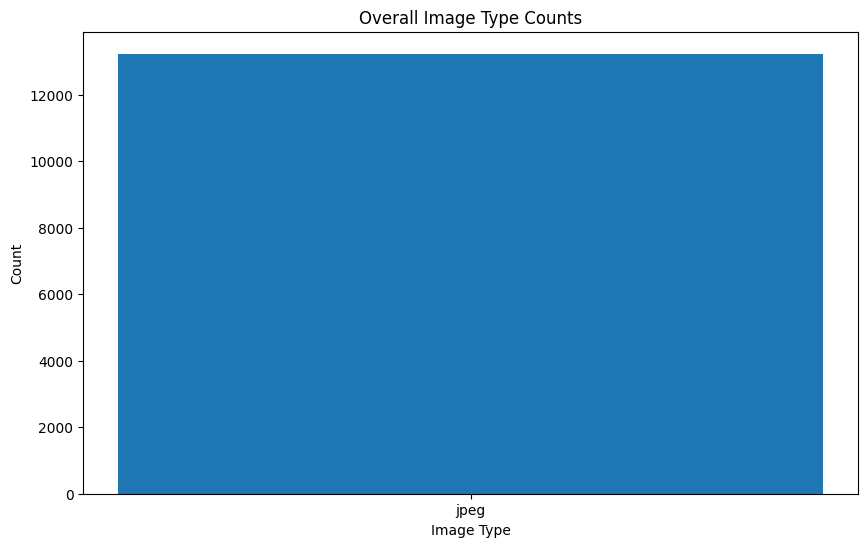

In [8]:
image_types = {}

for root, dirs, files in os.walk(DataPath):
    for file in files:
        file_path = os.path.join(root, file)
        if os.path.isfile(file_path):  # Check if it's a file (not a directory)
            image_type = imghdr.what(file_path)  # Get the image type
            if image_type is not None:
                if image_type not in image_types:
                    image_types[image_type] = 1
                else:
                    image_types[image_type] += 1

# Plotting the image types for each subfolder
labels = list(image_types.keys())
counts = list(image_types.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Overall Image Type Counts')
plt.show()

<Axes: xlabel='person'>

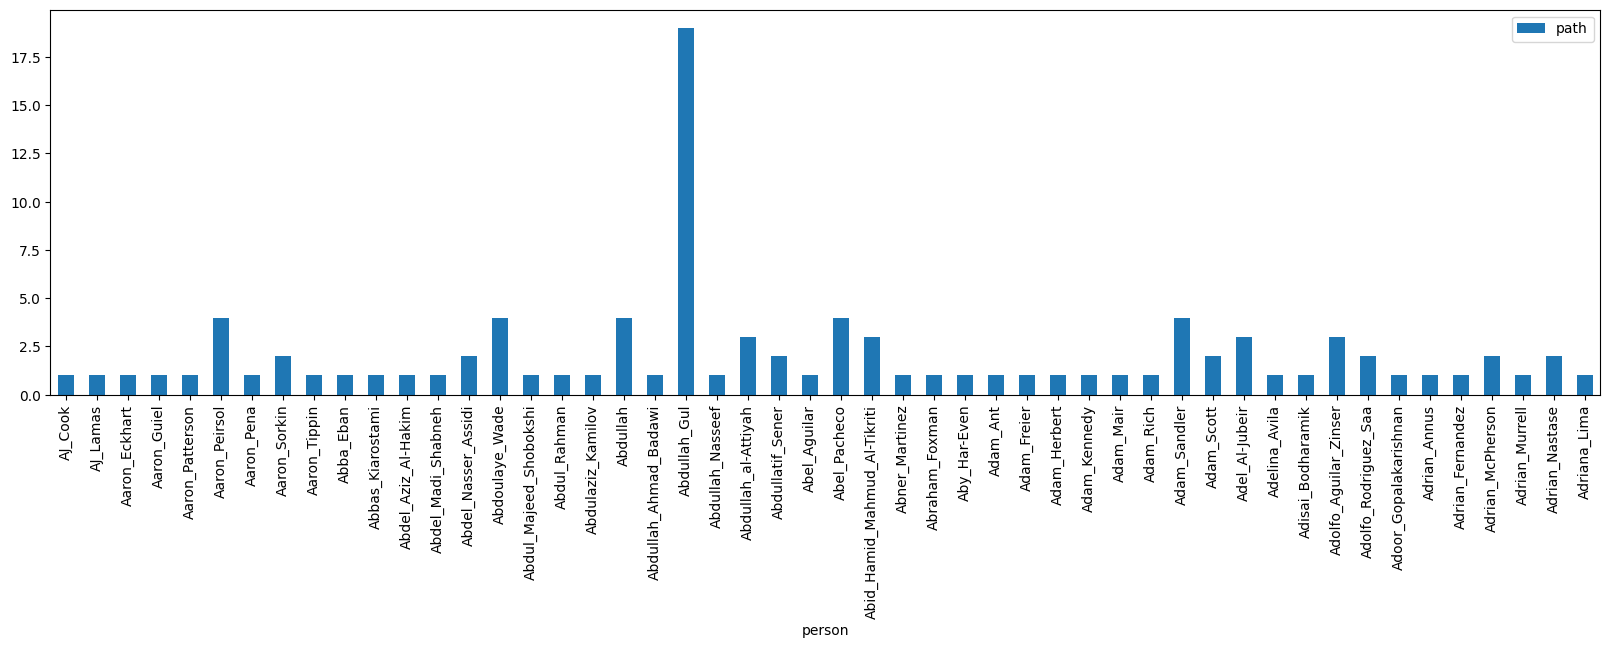

In [9]:
dataset.groupby("person").count()[:50].plot(kind='bar', figsize=(20,5))

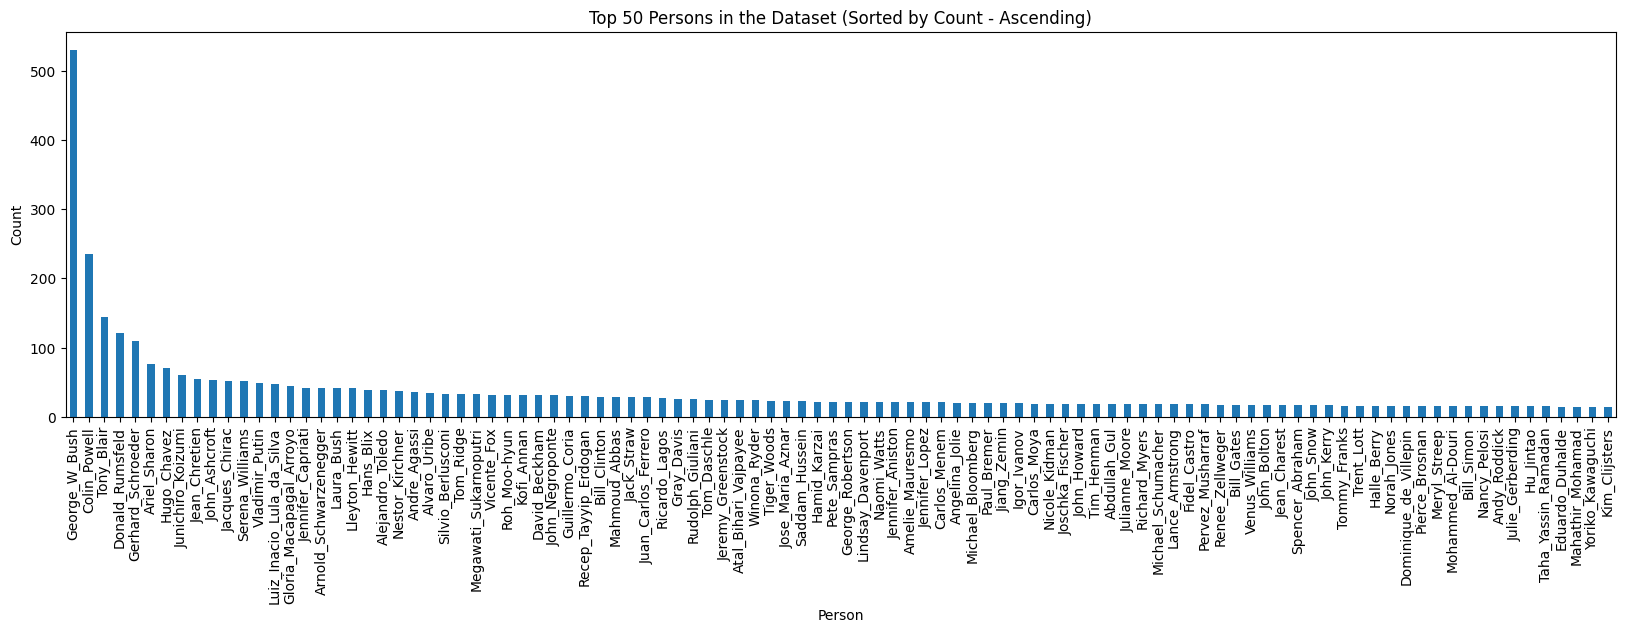

In [10]:
import matplotlib.pyplot as plt

counts = dataset.groupby("person").size().sort_values(ascending=False)[:100]
counts.plot(kind='bar', figsize=(20, 5))

plt.xlabel('Person')
plt.ylabel('Count')
plt.title('Top 50 Persons in the Dataset (Sorted by Count - Ascending)')
plt.xticks(rotation=90)
plt.show()

In [11]:
image_count = dataset['person'].value_counts()

image = image_count[image_count > 10]

print(image)

person
George_W_Bush            530
Colin_Powell             236
Tony_Blair               144
Donald_Rumsfeld          121
Gerhard_Schroeder        109
                        ... 
Nicanor_Duarte_Frutos     11
Sergey_Lavrov             11
Mike_Weir                 11
John_Paul_II              11
Ann_Veneman               11
Name: count, Length: 143, dtype: int64


In [12]:
image_sizes = []

for file in dataset['path']:
    image = cv2.imread(file)
    if image is not None:  # Check if the image was successfully loaded
        size = image.shape[:2]  # Get the dimensions (height, width)
        image_sizes.append(size)

# Update the dataset DataFrame with the 'Size' column
dataset['Size'] = image_sizes

dataset.head(10)

person                                           path        Size
0    Aaron_Eckhart      Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg  (250, 250)
1      Aaron_Guiel          Data\Aaron_Guiel\Aaron_Guiel_0001.jpg  (250, 250)
2  Aaron_Patterson  Data\Aaron_Patterson\Aaron_Patterson_0001.jpg  (250, 250)
3    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0001.jpg  (250, 250)
4    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0002.jpg  (250, 250)
5    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0003.jpg  (250, 250)
6    Aaron_Peirsol      Data\Aaron_Peirsol\Aaron_Peirsol_0004.jpg  (250, 250)
7       Aaron_Pena            Data\Aaron_Pena\Aaron_Pena_0001.jpg  (250, 250)
8     Aaron_Sorkin        Data\Aaron_Sorkin\Aaron_Sorkin_0001.jpg  (250, 250)
9     Aaron_Sorkin        Data\Aaron_Sorkin\Aaron_Sorkin_0002.jpg  (250, 250)

In [13]:
size_count = dataset['Size'].value_counts()
print(size_count)

Size
(250, 250)    13233
Name: count, dtype: int64


In [14]:
dataset['path'][0]

'Data\\Aaron_Eckhart\\Aaron_Eckhart_0001.jpg'

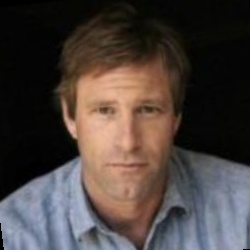

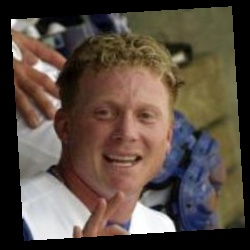

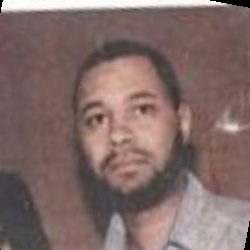

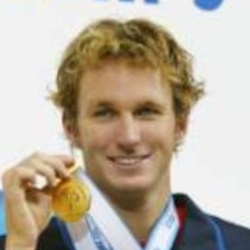

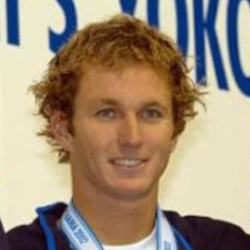

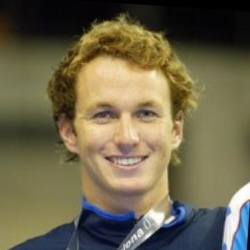

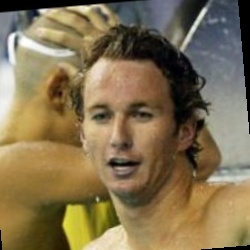

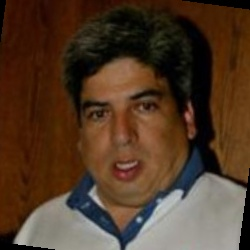

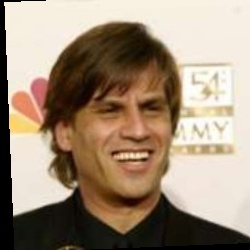

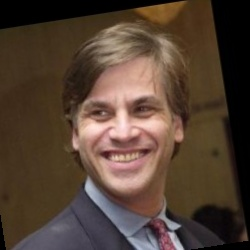

In [15]:
from IPython.display import display
from PIL import Image

for image in dataset['path'][:10]:
    display(Image.open(image))

Aaron_Eckhart


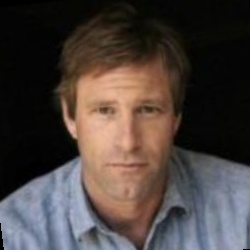

Aaron_Guiel


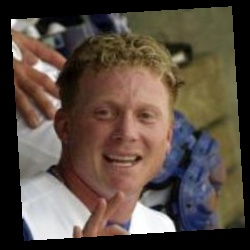

Aaron_Patterson


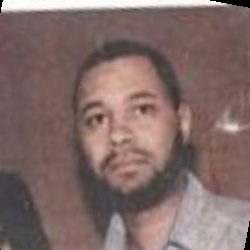

Aaron_Peirsol


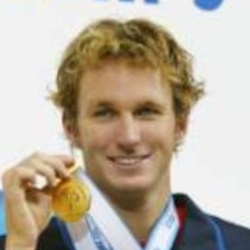

Aaron_Peirsol


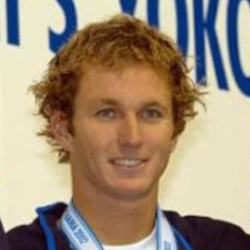

Aaron_Peirsol


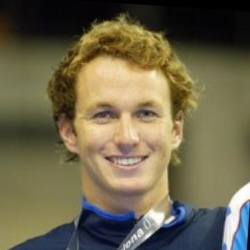

Aaron_Peirsol


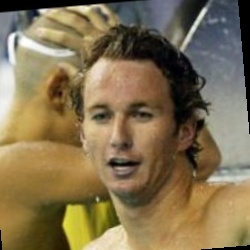

Aaron_Pena


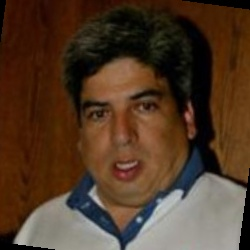

Aaron_Sorkin


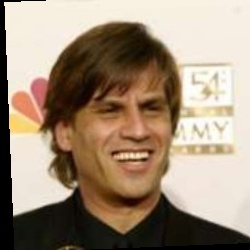

Aaron_Sorkin


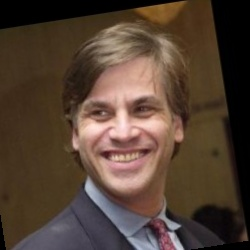

In [16]:
from IPython.display import display
from PIL import Image

for image, name in zip(dataset['path'][:10], dataset['person'][:10]):
    print(name)
    img = Image.open(image)
    display(img)
    img.close()

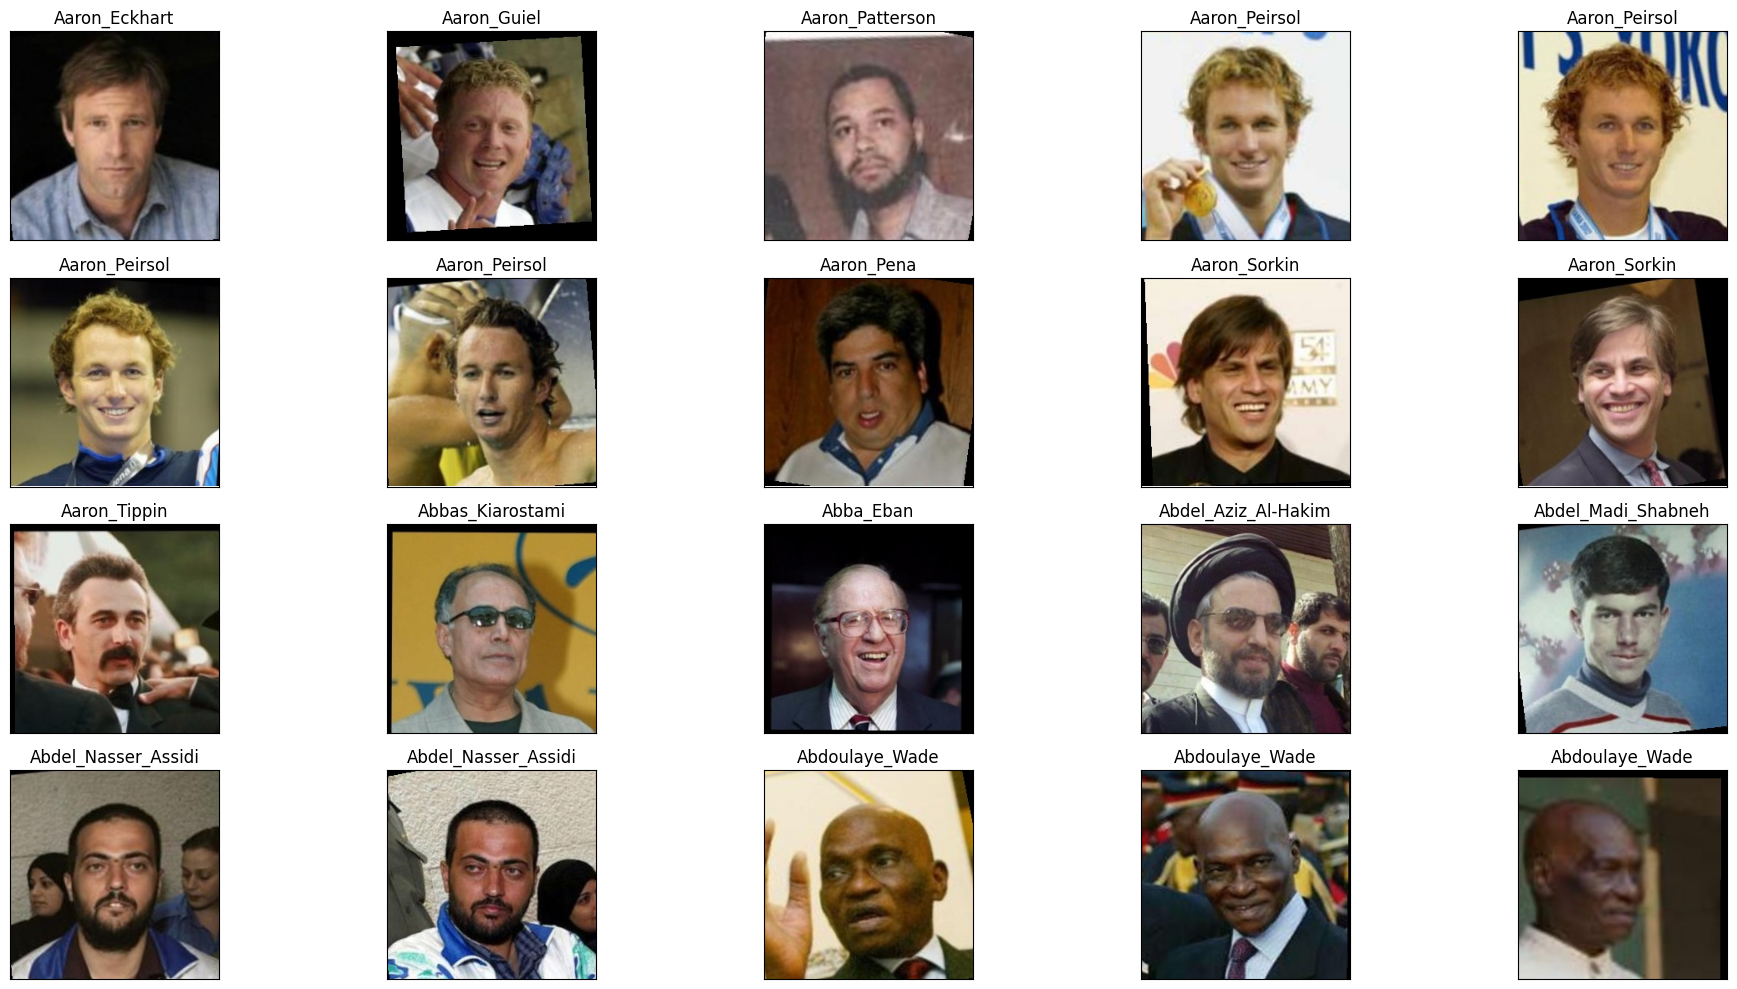

In [17]:
plt.figure(figsize=(20, 10))

for i, path in enumerate(dataset['path'][:20]):
    img = plt.imread(path)
    plt.subplot(4, 5, i+1)
    plt.imshow(img)
    plt.title(dataset['person'].iloc[i])
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

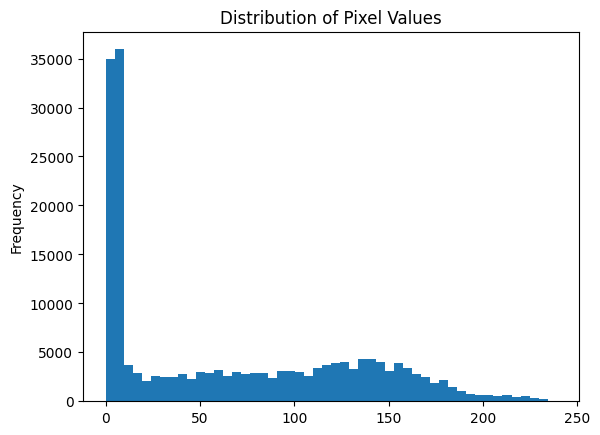

In [18]:
path = dataset['path'][0]
pixels = pd.Series(list(plt.imread(path).flatten()))

pixels.plot(kind='hist', bins=50, title='Distribution of Pixel Values')
plt.show()

In [19]:
image = plt.imread(path)
pixels = image.flatten()

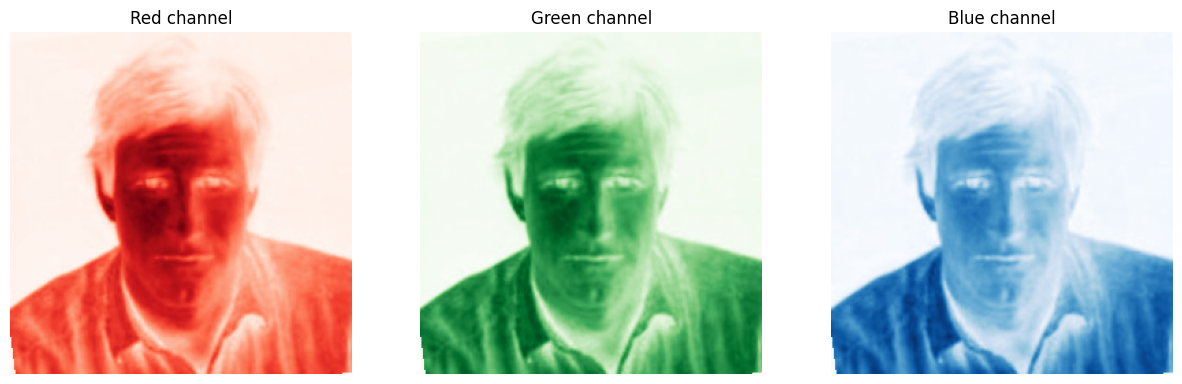

In [20]:
# Display RGB Channels of our image
image = plt.imread(path)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image[:, :, 0], cmap='Reds')
axs[1].imshow(image[:, :, 1], cmap='Greens')
axs[2].imshow(image[:, :, 2], cmap='Blues')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Red channel')
axs[1].set_title('Green channel')
axs[2].set_title('Blue channel')

plt.show()

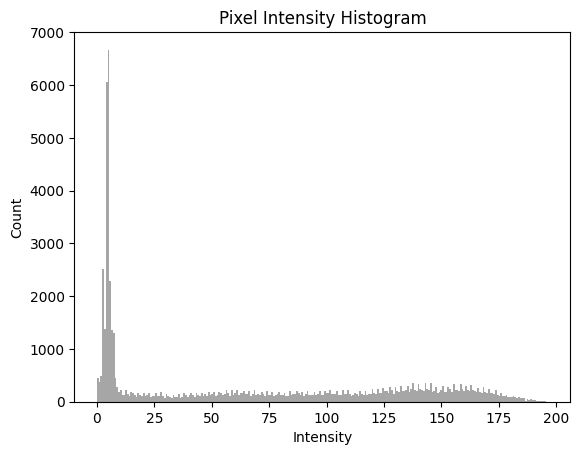

In [21]:
image = plt.imread(dataset['path'][0])

# Convert the image to grayscale if it's in color
if len(image.shape) > 2:
    image = np.mean(image, axis=2)

# Flatten the image to a 1D array
pixels = image.flatten()

# Plot the histogram
plt.hist(pixels, bins=256, color='gray', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.title('Pixel Intensity Histogram')

# Show the plot
plt.show()

# Preprocessing

In [22]:
# def clean(image_path):
#     new_size = (100, 100)  # Desired new size for the resized image
#     gray_images = []  # List to store the resulting grayscale images

#     for path in image_path:
#         # Read the image using OpenCV
#         image = cv2.imread(path)

#         # Resize the image using Pillow
#         resized_image = Image.fromarray(image).resize(new_size)

#         # Convert the image to grayscale
#         gray_image = cv2.cvtColor(np.array(resized_image), cv2.COLOR_BGR2GRAY)
        
#         gray_images.append(gray_image)  # Append the grayscale image to the list

#     return gray_images

In [23]:
# clean_image = clean(pre_dataset['path'][:5])

In [24]:
# gray_scale_images = clean(pre_dataset['path'][:5])

# # Display the grayscale images
# for i, img in enumerate(gray_scale_images):
#     plt.subplot(1, len(gray_scale_images), i+1)
#     plt.imshow(img, cmap='gray')
#     plt.axis('off')

# plt.tight_layout()
# plt.show()

In [25]:
# Just plot to see the function 
# Scale the image to gray
# for path in pre_dataset['path'][:5]:
#     img = cv2.imread(path)
#     gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     plt.imshow(gray_img, cmap='gray')
#     plt.show()

In [26]:
# Just plot to see the function 
# for path in pre_dataset['path'][:5]:
#     # Read the image using OpenCV
#     image = cv2.imread(path)

#     # Resize the image using Pillow
#     resized_image = Image.fromarray(image).resize((100, 100))

#     # Save the resized image
#     resized_image.save(path)

#     # Display the resized image using Matplotlib
#     plt.imshow(resized_image)
#     plt.show()

In [27]:
pre_dataset = dataset
pre_dataset

person                                               path  \
0           Aaron_Eckhart          Data\Aaron_Eckhart\Aaron_Eckhart_0001.jpg   
1             Aaron_Guiel              Data\Aaron_Guiel\Aaron_Guiel_0001.jpg   
2         Aaron_Patterson      Data\Aaron_Patterson\Aaron_Patterson_0001.jpg   
3           Aaron_Peirsol          Data\Aaron_Peirsol\Aaron_Peirsol_0001.jpg   
4           Aaron_Peirsol          Data\Aaron_Peirsol\Aaron_Peirsol_0002.jpg   
...                   ...                                                ...   
13228      Zorica_Radovic        Data\Zorica_Radovic\Zorica_Radovic_0001.jpg   
13229      Zulfiqar_Ahmed        Data\Zulfiqar_Ahmed\Zulfiqar_Ahmed_0001.jpg   
13230        Zumrati_Juma            Data\Zumrati_Juma\Zumrati_Juma_0001.jpg   
13231     Zurab_Tsereteli      Data\Zurab_Tsereteli\Zurab_Tsereteli_0001.jpg   
13232  Zydrunas_Ilgauskas  Data\Zydrunas_Ilgauskas\Zydrunas_Ilgauskas_000...   

             Size  
0      (250, 250)  
1      (250, 250)  
2      (250, 250)  
3      (250, 250)  
4      (250, 250)  
...           ...  
13228  (250, 250)  
13229  (250, 250)  
13230  (250, 250)  
13231  (250, 250)  
13232  (250, 250)  

[13233 rows x 3 columns]

In [52]:
def preprocess_image(image_path, target_size=(128, 128)):
    # Define the output directories for the dataset
    output_dir = "preprocess_data"

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    for path in image_path:

        file_name = path.split("\\")[2];

        # Load the image using OpenCV
        image = cv2.imread(path)

        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Resize the image to a desired size (e.g., 128x128)
        resized_image = cv2.resize(gray_image, target_size)

        # Normalize the image (scale pixel values to [0, 1])
        normalized_image = resized_image / 255.0

        # Save the preprocessed image to the output directory with the same filename
        output_path = os.path.join(output_dir, file_name)
        cv2.imwrite(output_path, normalized_image)
        print(f"Processed and saved: {output_path}")


In [53]:
preprocess_image(pre_dataset['path'][:5],(128,128))

Processed and saved: preprocess_data\Aaron_Eckhart_0001.jpg
Processed and saved: preprocess_data\Aaron_Guiel_0001.jpg
Processed and saved: preprocess_data\Aaron_Patterson_0001.jpg
Processed and saved: preprocess_data\Aaron_Peirsol_0001.jpg
Processed and saved: preprocess_data\Aaron_Peirsol_0002.jpg


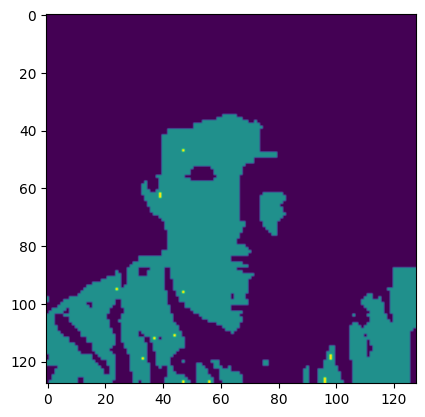

In [54]:
img = plt.imread("preprocess_data\Aaron_Eckhart_0001.jpg")
plt.imshow(img)

In [48]:
pp = []
for path in os.listdir("preprocess_data") :

    person = os.path.splitext(path)[0]
    pp.append({"person":person, "path": path})
    
pp = pd.DataFrame(pp)
pp

Aaron_Eckhart_0001.jpg
Aaron_Guiel_0001.jpg
Aaron_Patterson_0001.jpg
Aaron_Peirsol_0001.jpg
Aaron_Peirsol_0002.jpg


person                      path
0    Aaron_Eckhart_0001    Aaron_Eckhart_0001.jpg
1      Aaron_Guiel_0001      Aaron_Guiel_0001.jpg
2  Aaron_Patterson_0001  Aaron_Patterson_0001.jpg
3    Aaron_Peirsol_0001    Aaron_Peirsol_0001.jpg
4    Aaron_Peirsol_0002    Aaron_Peirsol_0002.jpg